## Functions

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import os

base_dir = os.getcwd() 
base_dir

'/home/willj/dev/pgaco/src/pgaco/experiments/ablation'

In [3]:
def get_ablation_data(problem_name, iterations = 1000):
    algs_list = ["ACO", "MMACO", "ACOSGD", "ADACO", "ACOPG", "ACOPPO"]
    
    file_template = ""
    files = [
             {"name": alg, "replay": size, "file": f"{base_dir}/results/{problem_name}_{alg}_{size}_{iterations}.npy"}
                for alg in algs_list 
                for size in ["none", "small", "big",]
            ]
    
    for f in files:
        try:
            results = (np.load(f["file"]))
            
        except Exception as e:
            print(e)
            print("Failed to find: " + f["file"])
            continue
            
        for i in range(results.shape[0]):
            f[f"results{i}"] = results[i]
            f[f"min_results{i}"] = float(results[i].min())
        f["min"] = results.min()
        f["min_avg"] = np.mean([results[i].min() for i in range(results.shape[0])])
        f["std"] = np.std([results[i].min() for i in range(results.shape[0])])
            
    dat = pd.DataFrame(files)

    dat = run_ablation_stats(dat)

    return dat


def get_comparative_data(problem_name, iterations = 1000):
    algs_list = ["ACO", "MMACO", "ACOSGD", "ADACO", "ACOPG", "ACOPPO"]
    
    file_template = ""
    files = [
             {"name": alg, "file": f"{base_dir}/../comparative/results/{problem_name}_{alg}_{iterations}.npy"}
                for alg in algs_list 
            ]
    
    for f in files:
        try:
            results = (np.load(f["file"]))
            
        except:
            print("Failed to find: " + f["file"])
            continue
            
        for i in range(results.shape[0]):
            f[f"results{i}"] = results[i]
            f[f"min_results{i}"] = float(results[i].min())
            f[f"min_acc_results{i}"] = np.minimum.accumulate(results[i])

        f["min"] = results.min()
        f["min_avg"] = np.mean([results[i].min() for i in range(results.shape[0])])
        f["std"] = np.std([results[i].min() for i in range(results.shape[0])])
        f["results_avg"] = np.mean([results[i] for i in range(results.shape[0])], axis=0)
        f["results_std"] = np.std([results[i] for i in range(results.shape[0])], axis=0)
        f["min_acc_avg"] = np.mean([f[f"min_acc_results{i}"] for i in range(results.shape[0])], axis=0)
        f["min_acc_std"] = np.std([f[f"min_acc_results{i}"] for i in range(results.shape[0])], axis=0)

    
    dat = pd.DataFrame(files)
    dat = run_comparative_stats(dat)

    return dat

In [4]:
def wilcox(dat):
    for alg in np.unique(dat["name"]):
        stat, p_value = wilcoxon(none, small)
        print(f"Statistic: {stat}, P-value: {p_value}")

def run_ablation_stats(dat):
    for alg in np.unique(dat["name"]):
        # Calculate the values for different replay types
        none_pt = dat.loc[(dat["name"] == alg) & (dat["replay"] == "none"), "min_avg"].values
        small_std = dat.loc[(dat["name"] == alg) & (dat["replay"] == "small"), "std"].values
        small_pt = dat.loc[(dat["name"] == alg) & (dat["replay"] == "small"), "min_avg"].values
        big_std = dat.loc[(dat["name"] == alg) & (dat["replay"] == "big"), "std"].values
        big_pt = dat.loc[(dat["name"] == alg) & (dat["replay"] == "big"), "min_avg"].values
    
        if none_pt.size > 0:  # Ensure none_pt is not empty
            none_pt = none_pt[0]
            
            # Assign percentages to the 'perc' column
            dat.loc[(dat["name"] == alg) & (dat["replay"] == "small"), "perc"] = 100 * (none_pt - small_pt) / none_pt
            dat.loc[(dat["name"] == alg) & (dat["replay"] == "big"), "perc"] = 100* (none_pt - big_pt) / none_pt
    return dat

def run_comparative_stats(dat):
    aco_pt = dat.loc[(dat["name"] == "ACO"), "min_avg"].values
    for alg in np.unique(dat["name"]):
        alg_pt = dat.loc[(dat["name"] == alg), "min_avg"].values
        dat.loc[(dat["name"] == alg), "perc"] = 100 * (aco_pt - alg_pt) / aco_pt
    return dat

In [5]:

import os 
cwd = os.getcwd()
cwd

'/home/willj/dev/pgaco/src/pgaco/experiments/ablation'

## Ablation Data

In [6]:
pr76_dat = get_ablation_data("pr76")
pr76_dat[["name", "replay", "perc"]]


,name,replay,perc
0,ACO,none,NaN
1,ACO,small,0.171337
2,ACO,big,0.618383
3,MMACO,none,NaN
4,MMACO,small,1.795789
5,MMACO,big,1.454393
6,ACOSGD,none,NaN
7,ACOSGD,small,2.455283
8,ACOSGD,big,3.064940
9,ADACO,none,NaN


In [7]:
df = pr76_dat
algorithm = "ACO"

none = df[(df['name'] == algorithm) & (df['replay'] == 'none')].iloc[:, 2:7].values.flatten()
small = df[(df['name'] == algorithm) & (df['replay'] == 'small')].iloc[:, 2:7].values.flatten()
big = df[(df['name'] == algorithm) & (df['replay'] == 'big')].iloc[:, 2:7].values.flatten()

print(none)
print(small)
print(big)

['/home/willj/dev/pgaco/src/pgaco/experiments/ablation/results/pr76_ACO_none_1000.npy'
 array([839294.24008464, 676481.0800872 , 660842.6925505 , ...,
        707085.10245373, 689733.15063456, 705011.99565453])
 651569.3759813269
 array([808575.58907403, 669417.15062725, 662361.43168357, ...,
        711094.93813973, 704302.32238123, 703546.43327102])
 651388.9085323925]
['/home/willj/dev/pgaco/src/pgaco/experiments/ablation/results/pr76_ACO_small_1000.npy'
 array([823991.46330668, 661818.56725237, 661818.56725237, ...,
        653108.12225785, 653108.12225785, 653108.12225785])
 653108.1222578471
 array([808575.58907403, 643677.90189055, 643677.90189055, ...,
        643677.90189055, 643677.90189055, 643677.90189055])
 643677.901890554]
['/home/willj/dev/pgaco/src/pgaco/experiments/ablation/results/pr76_ACO_big_1000.npy'
 array([818956.68824233, 656018.1246146 , 656018.1246146 , ...,
        647955.57110286, 647955.57110286, 647955.57110286])
 647955.5711028557
 array([805666.67400877

In [8]:
att48_dat = get_ablation_data("att48")
att48_dat[["name", "replay", "min", "min_avg", "perc"]]

,name,replay,min,min_avg,perc
0,ACO,none,217505.925094,218714.959884,NaN
1,ACO,small,213420.924080,216072.903468,1.207991
2,ACO,big,215021.331846,217676.234410,0.474922
3,MMACO,none,215318.475026,215846.984923,NaN
4,MMACO,small,210831.323158,211501.067166,2.013425
5,MMACO,big,208881.781793,210831.243396,2.323749
6,ACOSGD,none,204913.870674,207503.619901,NaN
7,ACOSGD,small,201802.202123,203794.908358,1.787300
8,ACOSGD,big,203264.668155,203609.116993,1.876836
9,ADACO,none,204718.545268,205481.739772,NaN


In [9]:
rd100_dat = get_ablation_data("rd100")
rd100_dat[["name", "replay", "min", "min_avg", "perc"]]

[Errno 2] No such file or directory: '/home/willj/dev/pgaco/src/pgaco/experiments/ablation/results/rd100_MMACO_none_1000.npy'
Failed to find: /home/willj/dev/pgaco/src/pgaco/experiments/ablation/results/rd100_MMACO_none_1000.npy
[Errno 2] No such file or directory: '/home/willj/dev/pgaco/src/pgaco/experiments/ablation/results/rd100_MMACO_small_1000.npy'
Failed to find: /home/willj/dev/pgaco/src/pgaco/experiments/ablation/results/rd100_MMACO_small_1000.npy


,name,replay,min,min_avg,perc
0,ACO,none,56655.332803,57227.826971,NaN
1,ACO,small,57112.246116,57476.694470,-0.434871
2,ACO,big,56105.217439,56799.229319,0.748932
3,MMACO,none,NaN,NaN,NaN
4,MMACO,small,NaN,NaN,NaN
5,MMACO,big,55195.485086,55579.201518,NaN
6,ACOSGD,none,54152.864608,54358.600506,NaN
7,ACOSGD,small,52739.758844,53101.094156,2.313353
8,ACOSGD,big,51770.443273,52169.657145,4.026857
9,ADACO,none,53344.393422,53447.489185,NaN


In [10]:
tsp225_dat = get_ablation_data("tsp225", iterations = 2000)
tsp225_dat[["name", "replay", "min", "min_avg", "perc"]]

[Errno 2] No such file or directory: '/home/willj/dev/pgaco/src/pgaco/experiments/ablation/results/tsp225_MMACO_none_2000.npy'
Failed to find: /home/willj/dev/pgaco/src/pgaco/experiments/ablation/results/tsp225_MMACO_none_2000.npy
[Errno 2] No such file or directory: '/home/willj/dev/pgaco/src/pgaco/experiments/ablation/results/tsp225_MMACO_small_2000.npy'
Failed to find: /home/willj/dev/pgaco/src/pgaco/experiments/ablation/results/tsp225_MMACO_small_2000.npy
[Errno 2] No such file or directory: '/home/willj/dev/pgaco/src/pgaco/experiments/ablation/results/tsp225_MMACO_big_2000.npy'
Failed to find: /home/willj/dev/pgaco/src/pgaco/experiments/ablation/results/tsp225_MMACO_big_2000.npy
[Errno 2] No such file or directory: '/home/willj/dev/pgaco/src/pgaco/experiments/ablation/results/tsp225_ACOSGD_none_2000.npy'
Failed to find: /home/willj/dev/pgaco/src/pgaco/experiments/ablation/results/tsp225_ACOSGD_none_2000.npy
[Errno 2] No such file or directory: '/home/willj/dev/pgaco/src/pgaco/expe

,name,replay,min,min_avg,perc
0,ACO,none,65398.995251,65592.286050,NaN
1,ACO,small,64984.377662,65172.403974,0.640139
2,ACO,big,64870.551606,65174.980706,0.636211
3,MMACO,none,NaN,NaN,NaN
4,MMACO,small,NaN,NaN,NaN
5,MMACO,big,NaN,NaN,NaN
6,ACOSGD,none,NaN,NaN,NaN
7,ACOSGD,small,NaN,NaN,NaN
8,ACOSGD,big,NaN,NaN,NaN
9,ADACO,none,62217.011439,62533.518588,NaN


## Comparative Data

In [11]:
att48_comp_dat = get_comparative_data("att48", iterations = 1000)
att48_comp_dat[["name", "min", "min_avg", "perc"]]

,name,min,min_avg,perc
0,ACO,215068.717278,217307.854594,0.000000
1,MMACO,208327.581189,211999.684242,2.442696
2,ACOSGD,202379.663814,203621.466111,6.298156
3,ADACO,204130.029117,205688.091617,5.347144
4,ACOPG,199643.209790,201289.690319,7.371185
5,ACOPPO,199183.571695,200534.504006,7.718704


In [12]:
try:
    pr76_comp_dat = get_comparative_data("pr76", iterations = 2000)
    display(pr76_comp_dat[["name", "min", "min_avg", "perc"]])
except:
    print("no data yet")

,name,min,min_avg,perc
0,ACO,637338.550045,648598.292224,0.000000
1,MMACO,623290.545669,632246.143338,2.521152
2,ACOSGD,594191.522751,601968.498908,7.189318
3,ADACO,604530.379377,609426.944975,6.039385
4,ACOPG,587883.813177,592670.373178,8.622890
5,ACOPPO,580065.695265,588047.763027,9.335598


In [13]:
try:
    rd100_comp_dat = get_comparative_data("rd100", iterations = 2000)
    display(rd100_comp_dat[["name", "min", "min_avg", "perc"]])
except Exception as e:
    print(e)
    print("no data yet")

,name,min,min_avg,perc
0,ACO,55674.034934,57067.838298,0.000000
1,MMACO,54448.135845,55271.438214,3.147833
2,ACOSGD,52692.832145,52960.877546,7.196629
3,ADACO,53025.754533,53352.774864,6.509907
4,ACOPG,51268.913999,51751.789185,9.315315
5,ACOPPO,51200.114995,51501.581210,9.753755


In [14]:
try:
    tsp225_comp_dat = get_comparative_data("tsp225", iterations = 5000)
    display(tsp225_comp_dat[["name", "min", "min_avg", "perc"]])
except:
    print("no data yet")

,name,min,min_avg,perc
0,ACO,64212.202144,65640.541712,0.000000
1,MMACO,63880.178759,64354.830993,1.958714
2,ACOSGD,61749.238231,61927.355982,5.656848
3,ADACO,62210.253184,62423.786978,4.900561
4,ACOPG,60689.888868,61057.349089,6.982259
5,ACOPPO,60037.811689,60557.235850,7.744156


In [15]:
try:
    pcb442_comp_dat = get_comparative_data("pcb442", iterations = 5000)
    display(pcb442_comp_dat[["name", "min", "min_avg", "perc"]])
except:
    print("no data yet")

,name,min,min_avg,perc
0,ACO,892400.213544,898921.148552,0.000000
1,MMACO,897504.328313,900967.368482,-0.227631
2,ACOSGD,852271.997580,856352.022051,4.735580
3,ADACO,861533.060598,863282.238330,3.964631
4,ACOPG,837901.378477,840541.218257,6.494444
5,ACOPPO,829909.713221,831123.619535,7.542100


In [16]:
try:
    att532_comp_dat = get_comparative_data("att532", iterations = 5000)
    display(att532_comp_dat[["name", "min", "min_avg", "perc"]])
except:
    print("no data yet")

,name,min,min_avg,perc
0,ACO,2.505244e+06,2.515390e+06,0.000000
1,MMACO,2.472036e+06,2.501418e+06,0.555470
2,ACOSGD,2.387551e+06,2.398916e+06,4.630464
3,ADACO,2.405643e+06,2.415955e+06,3.953055
4,ACOPG,2.359783e+06,2.366168e+06,5.932383
5,ACOPPO,2.336570e+06,2.340253e+06,6.962625


In [17]:
try:
    ali535_comp_dat = get_comparative_data("ali535", iterations = 5000)
    display(ali535_comp_dat[["name", "min", "min_avg", "perc"]])
except Exception as e:
    print(e)
    print("no data yet")

,name,min,min_avg,perc
0,ACO,49379.012698,49987.815132,0.000000
1,MMACO,49217.733735,49791.991989,0.391742
2,ACOSGD,47566.014756,47674.397870,4.627962
3,ADACO,47763.956113,47938.370214,4.099889
4,ACOPG,47050.924458,47183.553345,5.609891
5,ACOPPO,46319.607089,46514.178915,6.948966


In [19]:
adv_funcs = ["local", "path", "quality", "reward", "reward-baseline", "reward-to-go", "reward-to-go-baseline"]
graph = "tsp225"
files = [
         {"name": alg, "file": f"results/advtest/{graph}_{alg}.npy"}
            for alg in adv_funcs             
        ]

for f in files:
    try:
        results = (np.load(f["file"]))
        
    except:
        print("Failed to find: " + f["file"])
        continue
        
    for i in range(results.shape[0]):
        f[f"results{i}"] = results[i]
        f[f"min_results{i}"] = float(results[i].min())
    f["results_avg"] = np.mean(results, axis = 0)
    f["results_std"] = np.std(results, axis=0)
 

    f["min"] = results.min()
    f["min_avg"] = np.mean([results[i].min() for i in range(results.shape[0])])
    f["std"] = np.std([results[i].min() for i in range(results.shape[0])])
    
dat = pd.DataFrame(files)

# Parameters
start_point = 20
alpha = 0.3

# Data preparation
time_steps = np.arange(len(dat["results_avg"][0]))[start_point:]

# Color map for distinct colors
# tab10, rainbow
cmap = plt.get_cmap("tab20", len(dat.T[:-2]))
styles = ['-', '--',  ':', '-.', '--', '-',  '-.']

# Plot each algorithm's results
for idx, i in enumerate(dat.T[:-2]):
    aco_mean = dat.iloc[i]["results_avg"][start_point:]
    aco_std = dat.iloc[i]["results_std"][start_point:]
    
    plt.plot(time_steps, 
             aco_mean, 
             label=dat.iloc[i]["name"], 
             linestyle = styles[idx],
             color=cmap(idx)
            )
    # plt.fill_between(
    #     time_steps,
    #     aco_mean - aco_std,
    #     aco_mean + aco_std,
    #     alpha=alpha,
    #     color=cmap(idx),
    # )

# Formatting
plt.legend(loc="upper center", ncol=2, frameon=False)
plt.title(f"Advantage Function Comparison: {graph}", fontsize=14)
plt.ylabel(r"Cost ($f(x)$)", fontsize=12)
plt.xlabel(r"Iteration ($t$)", fontsize=12)
plt.grid(alpha=0.5, linestyle="--")
plt.tight_layout()

# Display
plt.savefig(f"results/advtest/advtest_{graph}_pretty.pdf")
plt.show()


Failed to find: results/advtest/tsp225_local.npy
Failed to find: results/advtest/tsp225_path.npy
Failed to find: results/advtest/tsp225_quality.npy
Failed to find: results/advtest/tsp225_reward.npy
Failed to find: results/advtest/tsp225_reward-baseline.npy
Failed to find: results/advtest/tsp225_reward-to-go.npy
Failed to find: results/advtest/tsp225_reward-to-go-baseline.npy


KeyError: 'results_avg'

## Stats Tests

In [20]:
ali535_comp_dat

,name,file,results0,min_results0,min_acc_results0,results1,min_results1,min_acc_results1,results2,min_results2,...,min_results9,min_acc_results9,min,min_avg,std,results_avg,results_std,min_acc_avg,min_acc_std,perc
0,ACO,/home/willj/dev/pgaco/src/pgaco/experiments/ab...,"[59658.69370904279, 50288.270765574474, 52344....",50288.270766,"[59658.69370904279, 50288.270765574474, 50288....","[58935.89680186439, 50125.02673848587, 52642.4...",50125.026738,"[58935.89680186439, 50125.02673848587, 50125.0...","[59229.971095607674, 49781.507428024255, 52724...",49781.507428,...,50030.788431,"[59826.73579538045, 50030.788431341374, 50030....",49379.012698,49987.815132,284.694806,"[59603.09012537914, 49987.815131977695, 52639....","[370.52403211612005, 284.6948064874255, 304.58...","[59603.09012537914, 49987.815131977695, 49987....","[370.52403211612005, 284.6948064874255, 284.69...",0.000000
1,MMACO,/home/willj/dev/pgaco/src/pgaco/experiments/ab...,"[61383.593616251455, 50279.03414565384, 50279....",49775.399684,"[61383.593616251455, 50279.03414565384, 50279....","[60536.935174826314, 50025.72413598648, 50025....",50025.724136,"[60536.935174826314, 50025.72413598648, 50025....","[60836.7595607522, 50032.74192956381, 50032.74...",49856.850781,...,49944.994791,"[61012.50673933862, 50196.850295989934, 50196....",49217.733735,49791.991989,206.136873,"[60741.65579519754, 49938.393094278596, 49938....","[408.2769720758459, 280.8770809877172, 280.877...","[60741.65579519754, 49938.393094278596, 49938....","[408.2769720758459, 280.8770809877172, 280.877...",0.391742
2,ACOSGD,/home/willj/dev/pgaco/src/pgaco/experiments/ab...,"[59658.69370904279, 49473.72138882996, 48837.5...",47566.014756,"[59658.69370904279, 49473.72138882996, 48837.5...","[58712.21961615501, 49721.251230257316, 48931....",47591.426239,"[58712.21961615501, 49721.251230257316, 48931....","[59229.971095607674, 49844.09204762428, 48728....",47647.442465,...,47718.847385,"[58911.77020413968, 49918.35886344994, 49651.2...",47566.014756,47674.397870,70.765532,"[59200.66478077155, 49855.01850068874, 49079.2...","[358.97036117065625, 217.26060181907096, 328.0...","[59200.66478077155, 49855.01850068874, 49079.2...","[358.97036117065625, 217.26060181907096, 328.0...",4.627962
3,ADACO,/home/willj/dev/pgaco/src/pgaco/experiments/ab...,"[59658.69370904279, 50288.270765574474, 52192....",47955.668929,"[59658.69370904279, 50288.270765574474, 50288....","[58935.89680186439, 50125.02673848587, 53254.3...",48031.024302,"[58935.89680186439, 50125.02673848587, 50125.0...","[59229.971095607674, 49781.507428024255, 52058...",48045.524163,...,47809.305949,"[59826.73579538045, 50030.788431341374, 50030....",47763.956113,47938.370214,110.256076,"[59603.09012537914, 49987.815131977695, 52575....","[370.52403211612005, 284.6948064874255, 354.14...","[59603.09012537914, 49987.815131977695, 49987....","[370.52403211612005, 284.6948064874255, 284.69...",4.099889
4,ACOPG,/home/willj/dev/pgaco/src/pgaco/experiments/ab...,"[59658.69370904279, 49473.72138882996, 48416.2...",47324.927101,"[59658.69370904279, 49473.72138882996, 48416.2...","[58712.21961615501, 49721.251230257316, 48628....",47266.594164,"[58712.21961615501, 49721.251230257316, 48628....","[59229.971095607674, 49844.09204762428, 48371....",47096.970672,...,47174.389323,"[58911.77020413968, 49918.35886344994, 49588.5...",47050.924458,47183.553345,81.455532,"[59200.66478077155, 49855.01850068874, 48946.6...","[358.97036117065625, 217.26060181907096, 406.0...","[59200.66478077155, 49855.01850068874, 48946.6...","[358.97036117065625, 217.26060181907096, 406.0...",5.609891
5,ACOPPO,/home/willj/dev/pgaco/src/pgaco/experiments/ab...,"[59658.69370904279, 49473.72138882996, 47903.5...",46473.282983,"[59658.69370904279, 49473.72138882996, 47903.5...","[58712.21961615501, 49721.251230257316, 47832....",46567.024513,"[58712.21961615501, 49721.251230257316, 47832....","[59229.971095607674, 49844.09204762428, 47770....",46473.359238,...,46693.249658,"[58911.770204

In [21]:
def problem_graph(dat, start_point=0, end_point=-1):
    
    # Parameters
    alpha = 0.3
    
    # Data preparation
    
    # Color map for distinct colors
    # tab10, rainbow
    cmap = plt.get_cmap("tab20", len(np.unique(dat[["name"]])))
    styles = ['-', '--',  ':', '-.', '--', '-',  '-.']
    
    
    for idx, alg in enumerate(np.unique(dat[["name"]])):
        if end_point == -1:
            end_point = len(np.array(dat.loc[(dat["name"] == alg), "min_acc_avg"])[0])
        print(alg)
        # Plot each algorithm's results
        aco_mean = np.array(dat.loc[(dat["name"] == alg), "min_acc_avg"])[0][start_point:end_point]
        aco_std = np.array(dat.loc[(dat["name"] == alg), "min_acc_std"])[0][start_point:end_point]

                          
        time_steps = np.arange(start_point, end_point)
    
        plt.plot(time_steps,
                 aco_mean,
                 label=alg, 
                 linestyle = styles[idx],
                 color=cmap(idx)
                )
        plt.fill_between(
            time_steps,
            aco_mean - aco_std,
            aco_mean + aco_std,
            alpha=alpha,
            color=cmap(idx),
        )
    
    plt.legend(loc="upper center", ncol=2, frameon=False)
    plt.title(f"Advantage Function Comparison: {graph}", fontsize=14)
    plt.ylabel(r"Cost ($f(x)$)", fontsize=12)
    plt.xlabel(r"Iteration ($t$)", fontsize=12)
    plt.grid(alpha=0.5, linestyle="--")
    plt.tight_layout()
    
    plt.show()

ACO
ACOPG
ACOPPO
ACOSGD
ADACO
MMACO


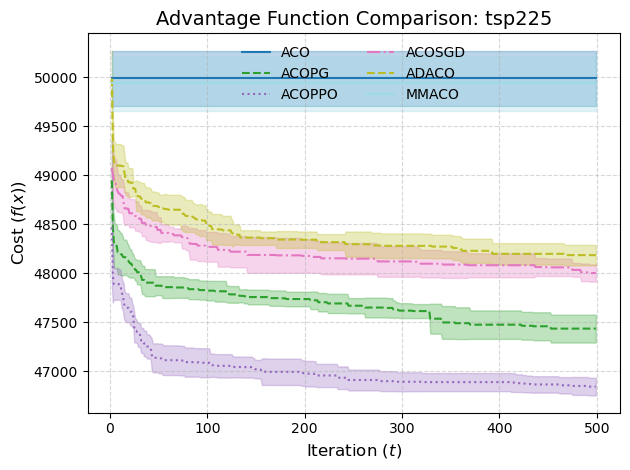

ACO
ACOPG
ACOPPO
ACOSGD
ADACO
MMACO


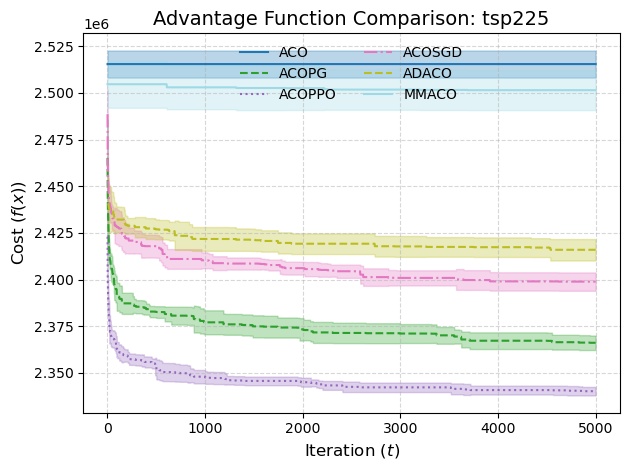

ACO
ACOPG
ACOPPO
ACOSGD
ADACO
MMACO


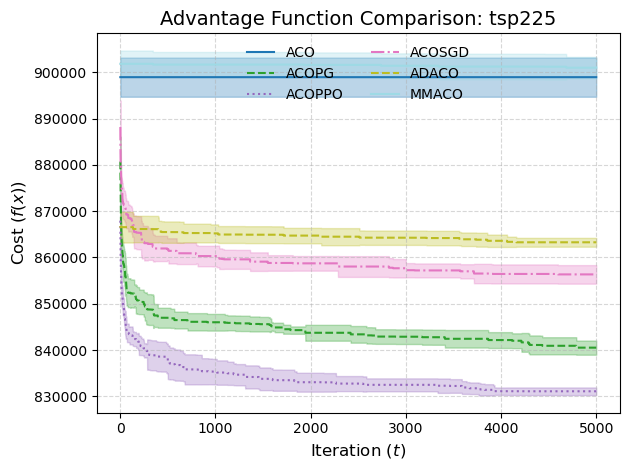

In [22]:
problem_graph(att48_comp_dat, name = "ali535")
problem_graph(pr76_comp_dat, name = "ali535")
problem_graph(rd100comp_dat, name = "ali535")

problem_graph(tsp100_comp_dat, name = "ali535")
problem_graph(ali535_comp_dat, name = "ali535")

problem_graph(ali535_comp_dat, name = "ali535")
problem_graph(att532_comp_dat, name = "att532")
problem_graph(pcb442_comp_dat, name = "pcb442")

In [ ]:
from scipy.stats import ttest_ind

aco_dat = np.array(ali535_comp_dat.loc[(ali535_comp_dat["name"] == "ACO"), "min_acc_avg"])[0]
other_dat = np.array(ali535_comp_dat.loc[(ali535_comp_dat["name"] == "ACOPPO"), "min_acc_avg"])[0]

ttest_ind(aco_dat, other_dat)

In [ ]:
aco_dat